# Dataset

Link to the dataset used in this project: 
- https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

References for the Project Brief (From Pacmann AI Projects):

- SQL & Data Wrangling Briefing:  https://docs.google.com/document/d/1qeFNL-lqe54XxJoNIzDXQ3zg2lovyZYwv0Q3bY6-p24/preview
- Business Analyst Briefing: https://docs.google.com/document/d/1QiTesa2TwGb_lRV2Ygz9PG2EWGgPv5hx/preview#heading=h.gjdgxs



# Introduction

In this analysis, the Olist dataset will be used to analyze product sales from this Brazilian marketplace. The analysis will focus on data from São Paulo, because 41.98% of transactions (41,746 orders) come from São Paulo. Due to incomplete data, the data used for this analysis only cover from the periods January to August 2017 and January to August 2018. There is two parts of this analysis, the first part is to create a data mart and the second part is to do product sales analysis.
The Olist dataset includes several CSV files from various tables (e.g., customer, order_items, order_payments, orders, product) and this dataset also came from many cities in Brazil. To make it more efficient, a data mart will be created:
- Extract, transform, and load multiple Olist datasets from CSV to a PostgreSQL database using Psycopg2 and DuckDB.
- The data mart will contain data from specific customer states, in this case, the highest order of customers, which is from São Paulo (SP).

The objectives of this analysis are:
- Determine the sales trend from 2017 to 2018,
- Identify whether the most purchased and highest-selling categories remained consistent or shifted between 2017 and 2018,
- Assess whether the average order value increased or decreased from 2017 to 2018

The insights gained from this analysis can be used to inform sellers about marketplace trends and assist the marketing team in creating targeted advertisements that align with customer preferences.


<!-- In this project, we will use the Olist dataset to analyze product sales from the Brazilian marketplace. We aim to use sales data from São Paulo for the periods January to August 2017 and January to August 2018. Our goals are to determine whether the sales trend is positive, identify if the most purchased and highest revenue products remain within the same category or have changed, find out which products are the most purchased and generate the most revenue, assess whether the average order value has increased or decreased from 2017 to 2018, and identify products or categories that are frequently bought more than one or bougth together.

After knowing all of that, we can use the information to inform the sellers about the trends of this marketplace and also inform the marketing team to make ads that what customer potentially want to buy. -->

## Goals & Objective

**A. ETL to Create a Data Mart**

The Olist dataset includes several CSV files from various tables (e.g., customer, order_items, order_payments, orders, product) and this dataset also came from many cities in Brazil. To make it more efficient, a data mart will be created:
- Extract, transform, and load multiple olist datasets from CSV to a PostgreSQL database using Psycopg2 and DuckDB.
- The data mart will contain data from specific customer states, in this case, the highest order of customers, which is from São Paulo (SP).


**B. Product Sales Analysis**
1. Sales & Order Trend Analysis
  * Sales & Order Growth Rate Yearly (2017 and 2018)
    - Percentage change in total Sales & Orders from 2017 to 2018
  * Monthly Sales & Order Trend
    - Sales & Orders broken down by month to visualize trends with line chart
    
2. Product Performance Analysis
  * Top 10 highest-sold category (2017 and 2018)
    - Top 10 Category Purchased: Top 10 of Count units sold for each category.
    - Top 10 Category Sales: Top 10 of Total sales for each category.

3. Average order value (AOV) 2017 and 2018
* AOV for 2017 and 2018
* Top 10 AOV from category product
- Notes:
  - Average Order Value (AOV): Average sales per order, calculated by dividing total sales by the number of orders.
  - AOV Comparison: Compare AOV between 2017 and 2018; Compare top 10 AOV in each category product

<!--
Goals dalam projek ini ada tiga, yaitu:
1. Analisis Annual and Monthly Revenue dan Order
- Objective: Analisis Total Revenue dan total order yang telah dilakukan setiap tahun dan bulan. Selain itu juga dilihat total revenue dan total order berdasarkan order status, payment type, top 5 city dan top 5 product category
2. Analisis Annual and Monthly Customer Activity
- Objective: Analisis rata-rata customer yang aktif, customer baru, customer repeat order dan rata-rata customer order tiap bulan dan tiap tahun.
3. Perbandingan Revenue dari Customer Baru dan Customer Repeat Order
- Objective: Membandingkan Revenue dari Customer Baru dan Customer Repeat Order -->

<!--
https://www.pipedrive.com/en/blog/sales-data

=> Analisis sales growth and customer growth

→ sales revenue
https://www.leadsquared.com/learn/sales/sales-growth/

  - Revenue & order tiap bulan-tahun & tiap tahun
  - jangan lupa cari pct of change nya untuk tahu growth nya

→ Annual Customer Activity Growth Analysis
https://www.everafter.ai/glossary/customer-growth-rate
- Jadi bandingin monthly active user (MAU), new customer, repeating customer dan average order per customer di tiap bulan-tahun
- Bandingin rata-rata monthly active user & new customer
Lihat repeating order nya
- Table: Customer, orders

  → Lihat user growth nya tiap tahun (setiap state dan top 5 city)
  - Table: customers, orders, order_payments


→ Ratio of sales made to new vs existing customer
- https://stackoverflow.com/questions/57823209/calculate-recurring-customer
- https://www.datacamp.com/tutorial/customer-life-time-value

  →  Customer lifetime value
  - https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value#:~:text=Customer%20Lifetime%20Value%20%3D%20(Customer%20Value,purchases%20to%20determine%20customer%20value. -->

# Initialization

## Mount Drive

In [1]:
# # Mounting Google Drive if you use google colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [1]:
# Import Libraries
import sqlite3
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import duckdb
import os
import psycopg2
import psycopg2.extras as extras 
import pandas.io.sql as psql

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reset configuration of seaborn & matplotlib
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

## Read CSV files

In [3]:
# Read All Dataset
customer = pd.read_csv('dataset/customers_dataset.csv')
order_items = pd.read_csv('dataset/order_items_dataset.csv')
order_payments = pd.read_csv('dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('dataset/order_reviews_dataset.csv')
product = pd.read_csv('dataset/product_dataset.csv')
sellers = pd.read_csv('dataset/sellers_dataset.csv')
orders = pd.read_csv('dataset/orders_dataset.csv')
geolocation = pd.read_csv('dataset/geolocation_dataset.csv')

In [4]:
# # Read All Dataset in google drive
# customer = pd.read_csv('/content/drive/MyDrive/dataset/customers_dataset.csv')
# order_items = pd.read_csv('/content/drive/MyDrive/dataset/order_items_dataset.csv')
# order_payments = pd.read_csv('/content/drive/MyDrive/dataset/order_payments_dataset.csv')
# order_reviews = pd.read_csv('/content/drive/MyDrive/dataset/order_reviews_dataset.csv')
# product = pd.read_csv('/content/drive/MyDrive/dataset/product_dataset.csv')
# sellers = pd.read_csv('/content/drive/MyDrive/dataset/sellers_dataset.csv')
# orders = pd.read_csv('/content/drive/MyDrive/dataset/orders_dataset.csv')
# geolocation = pd.read_csv('/content/drive/MyDrive/dataset/geolocation_dataset.csv')

# Data Overview & Understanding

#### customers

In [4]:
# Look at the dataset
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Check data type and missing values
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Check distinct value
customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [7]:
# Count customer based on their state
customer['customer_state'].value_counts(ascending=False)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [8]:
# Percentage customer based on their state
customer['customer_state'].value_counts(normalize=True, ascending=False)

SP    0.419807
RJ    0.129242
MG    0.117004
RS    0.054967
PR    0.050734
SC    0.036574
BA    0.033990
DF    0.021520
ES    0.020444
GO    0.020314
PE    0.016613
CE    0.013435
PA    0.009805
MT    0.009121
MA    0.007512
MS    0.007190
PB    0.005390
PI    0.004978
RN    0.004877
AL    0.004153
SE    0.003520
TO    0.002816
RO    0.002544
AM    0.001488
AC    0.000815
AP    0.000684
RR    0.000463
Name: customer_state, dtype: float64

#### geolocation

In [ ]:
# Look at the data
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Check data type and missing values
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# Check distinct value
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

#### order_items

In [9]:
# Look at the data
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
# Check data type and missing values
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
# Check distinct value
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [24]:
# Check when order_id has more than 1 product id
or_gb = order_items.groupby('order_id').agg({"product_id":"count", "order_item_id":"max"})
or_gb = or_gb.reset_index()
or_gb[or_gb['product_id'] > 2].head()

,order_id,product_id,order_item_id
31,00143d0f86d6fbd9f9b38ab440ac16f5,3,3
39,001ab0a7578dd66cd4b0a71f5b6e1e41,3,3
124,00526a9d4ebde463baee25f386963ddc,4,4
134,005d9a5423d47281ac463a968b3936fb,3,3
228,00a57dfbb049fbaae10763e2cf15f797,3,3


`order_item_id` is the same as count product in each order

In [26]:
# Check if the count of product_id and max order_item_id has the same value
or_gb["check"] = or_gb['product_id'] == or_gb['product_id']
or_gb[or_gb["check"] == "False"]

,order_id,product_id,order_item_id,check


count of product_id and max order_item_id has the same value

In [13]:
# check each price, when order_id has more than 2 product_id
p_or = order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']
p_or

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [14]:
# check order_id where customer_id from SP and has product_id total more than 1
order_item_sp = order_items.merge(orders, on = 'order_id', how = 'left')
order_item_sp = order_item_sp.merge(customer, on = 'customer_id', how = 'left')
order_item_sp = order_item_sp[order_item_sp['customer_state'] == 'SP']
order_item_sp = order_item_sp.groupby('order_id').agg({"product_id":"count"})
order_item_sp = order_item_sp.reset_index()
order_item_sp[order_item_sp['product_id'] > 1].head()

,order_id,product_id
9,0008288aa423d2a3f00fcb17cd7d8719,2
23,001d8f0e34a38c37f7dba2a37d4eba8b,2
30,002c9def9c9b951b1bec6d50753c9891,2
32,00337fe25a3780b3424d9ad7c5a4b35e,2
52,00526a9d4ebde463baee25f386963ddc,4


In [10]:
# Check order_item_id
order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

#### order_payments

In [ ]:
# Look at the data
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
# Check data type and missing values
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Check distinct value
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [27]:
# check deeper at order_id 00143d0f86d6fbd9f9b38ab440ac16f5
order_payments[order_payments['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
29413,00143d0f86d6fbd9f9b38ab440ac16f5,1,credit_card,1,109.29


#### Context For Sales & Revenue

In [ ]:
# Check when payment sequantial > 1
# order_payments[order_payments['payment_sequential'] > 1].head()
order_payments[order_payments['order_id'] == 'ea9184ad433a404df1d72fa0a8764232']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
40168,ea9184ad433a404df1d72fa0a8764232,1,credit_card,1,17.78
78613,ea9184ad433a404df1d72fa0a8764232,3,voucher,1,22.49
94151,ea9184ad433a404df1d72fa0a8764232,2,voucher,1,22.49
99425,ea9184ad433a404df1d72fa0a8764232,5,voucher,1,22.47


In [11]:
# Check order payment and price with the same order id
ordit_price = order_items[order_items['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']['price'].values
total_order = order_items[order_items['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']['order_item_id'].values
order_freight_value = order_items[order_items['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']['freight_value'].values
ordpay_value = order_payments[order_payments['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']['payment_value'].values
print(f'Price: {ordit_price}')
print(f'Total Order: {total_order}')
print(f'freight_value: {order_freight_value}') #It's like delivery fee
print(f'Payment Value: {ordpay_value}')

Price: [79.8]
Total Order: [1]
freight_value: [19.53]
Payment Value: [99.33]


In [12]:
# Check order payment and price with the same order id
ordit_price = order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']['price'].values
total_order = order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']['order_item_id'].values
order_freight_value = order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']['freight_value'].values
ordpay_value = order_payments[order_payments['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']['payment_value'].values
print(f'Price: {ordit_price}')
print(f'Total Order: {total_order}')
print(f'freight_value: {order_freight_value}') #It's like delivery fee
print(f'Payment Value: {ordpay_value}')

Price: [21.33 21.33 21.33]
Total Order: [1 2 3]
freight_value: [15.1 15.1 15.1]
Payment Value: [109.29]


In [13]:
# Check order_item_id > 5
order_items[order_items['order_item_id'] > 5].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1598,03aba68b07658f28f29612641f08d4ba,6,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:17,170.0,30.44
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
2037,04993613aee4046caf92ea17b316dcfb,6,078e8db43688ea060cf754e7bd2b92e7,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,48.0,10.54


In [15]:
# Check order payment and price with the same order id, that have order_item_id = 8 
ordit_price = order_items[order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']['price'].values
total_order = order_items[order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']['order_item_id'].values
order_freight_value = order_items[order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']['freight_value'].values
ordpay_value = order_payments[order_payments['order_id'] == '03caa2c082116e1d31e67e9ae3700499']['payment_value'].values
print(f'Price: {ordit_price}')
print(f'Total Order: {total_order}')
print(f'freight_value: {order_freight_value}') #It's like delivery fee
print(f'Payment Value: {ordpay_value}')

Price: [1680. 1680. 1680. 1680. 1680. 1680. 1680. 1680.]
Total Order: [1 2 3 4 5 6 7 8]
freight_value: [28.01 28.01 28.01 28.01 28.01 28.01 28.01 28.01]
Payment Value: [13664.08]


Since this analysis focus on sales, so the term in the next analysis will be about sales, not revenue. From the data provided above, we can make sure that `payment value` in order_payments dataset is total of all `price` of products and total of all `freight_value` (like delivery fee) in the same `order id`. So, to find the sales within the same `order id` is to sum all of the `price` in those `order id`

#### order_reviews

In [ ]:
# Look at the data
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# check data type and missing values
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Check distinct value
order_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

#### orders

In [ ]:
# Look at the data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Check data type and missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Check distinct value
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
# Count of each order status
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
# Check year and month order_purchase_timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month_order'] = orders['order_purchase_timestamp'].dt.month
orders['year_order'] = orders['order_purchase_timestamp'].dt.year
ord_ym = orders.groupby(['year_order', 'month_order']).agg({'order_id':'count'})
ord_ym

order_id
year_order month_order          
2016       9                   4
           10                324
           12                  1
2017       1                 800
           2                1780
           3                2682
           4                2404
           5                3700
           6                3245
           7                4026
           8                4331
           9                4285
           10               4631
           11               7544
           12               5673
2018       1                7269
           2                6728
           3                7211
           4                6939
           5                6873
           6                6167
           7                6292
           8                6512
           9                  16
           10                  4

In [21]:
# Find total customer state in orders dataset
# Join dataset orders and customer
df_order_state = pd.merge(orders, customer, left_on='customer_id',
                          right_on='customer_id', how='left')

# find total state
order_state = df_order_state.groupby('customer_state').agg({'order_id':'count'}).sort_values('order_id',ascending=False)
order_state = order_state.reset_index()
order_state['percentage'] = (order_state['order_id'] / order_state['order_id'].sum()) * 100
order_state

,customer_state,order_id,percentage
0,SP,41746,41.980672
1,RJ,12852,12.924247
2,MG,11635,11.700405
3,RS,5466,5.496727
4,PR,5045,5.073360
5,SC,3637,3.657445
6,BA,3380,3.399000
7,DF,2140,2.152030
8,ES,2033,2.044428
9,GO,2020,2.031355


In [ ]:
# Check repeat order of customer
repeat_ord = orders.groupby('customer_id').agg({'order_id':'count'})
repeat_ord = repeat_ord.reset_index()
repeat_ord[repeat_ord['order_id'] > 1]

,customer_id,order_id


#### product

In [16]:
# Look at the data
product.head()

,no,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
# Check data type and missing values
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no                          32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [18]:
# Check distinct value
product.nunique()

no                            32951
product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [19]:
# Product percentage missing value
product.isnull().sum() * 100 / len(product)

no                            0.000000
product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

##### Impute missing values in product_category_name

In [20]:
# Impute missing value of 'product_category_name' with its mode
product['product_category_name'] = product['product_category_name'].fillna(product['product_category_name'].mode()[0])

# Product percentage missing value (After imputation)
product.isnull().sum() * 100 / len(product)

no                            0.000000
product_id                    0.000000
product_category_name         0.000000
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

#### sellers

In [ ]:
# Look at the data
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Check data type and missing values
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Check distinct value
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

# Part 1. Create a Data Mart

To perform the ETL process, the first step is to create a database in PostgreSQL. Next, connect to PostgreSQL using both DuckDB and Psycopg2 in Python. DuckDB will be used for querying and transforming data, while Psycopg2 will be used for creating tables and loading data into PostgreSQL.

## Function to Connect Duckdb and Psycopg2

In [4]:
def connect_duckdb():
  """
  Function to Connect PostgreSQL using DuckDB

  Returns:
    conn: A duckdb connection and print the connection is success
  """
  # Create duckDB connection
  conn = duckdb.connect('')
  # Install postgres_scanner
  conn.execute("INSTALL postgres_scanner;")
  # Load postgres_scanner
  conn.execute("LOAD postgres_scanner;")
  # Connect to database
  conn.execute("CALL postgres_attach('dbname=olist_database user=postgres host=127.0.0.1 password=789HibalK');")
  print('Successfully connected to database')

  return conn

In [5]:
conn_d = connect_duckdb()

Successfully connected to database


In [25]:
def connect_psycopg2():
  """
  Connect to PostgreSQL using psycopg2

  Returns:
    conn: A duckdb connection and print the connection is success
  """
  # Building the database connection
  conn = psycopg2.connect(database = "olist_database", 
                          user = "postgres", 
                          host= 'localhost',
                          password = "789HibalK",
                          port = 5432)
  print('Successfully connected to database')
  
  return conn

In [26]:
conn_p = connect_psycopg2()
cursor_p = conn_p.cursor()

Successfully connected to database


## Function to Extract, transform, and load






The function below is used to insert data into the PostgreSQL table.

In [25]:
# References:
# https://www.geeksforgeeks.org/how-to-insert-a-pandas-dataframe-to-an-existing-postgresql-table/
# https://github.com/NaysanSaran/pandas2postgresql/blob/master/notebooks/Psycopg2_Bulk_Insert_Speed_Benchmark.ipynb

def execute_values(conn, df, table): 
    """
    Using psycopg2.extras.execute_values() to insert the dataframe

    Parameters:
        conn: the conn_psycopg2.
        df (pd.DataFrame): The DataFrame final of each table.
        table (str): The name of the dataset.

    Returns:
        conn: print the dataframe has been inserted
    """
    tuples = [tuple(x) for x in df.to_numpy()] 
  
    cols = ','.join(list(df.columns)) 
    # SQL query to execute 
    query = "INSERT INTO %s(%s) VALUES %%s" % (table, cols) 
    cursor = conn.cursor() 
    try: 
        extras.execute_values(cursor, query, tuples) 
        conn.commit() 
    except (Exception, psycopg2.DatabaseError) as error: 
        print("Error: %s" % error) 
        conn.rollback() 
        cursor.close() 
        return 1
    print("the dataframe is inserted") 
    cursor.close() 

In the ETL function below, Pandas is used to read the dataset. Next, each table is created using psycopg2. The data is then filtered to keep only orders from the state of São Paulo (SP) using a WHERE clause in DuckDB. Finally, the filtered data is inserted into each table using the execute_values function.

In [26]:
def etl(dataset):
  """
  Function to Exctract, Transform and Load dataset
  from csv to table in PostgreSQL.
  Parameters:
    dataset (string): name of the csv file
  """
  try:
    # Connect to duckdb
    conn_duckdb = conn_d
    # Connect to psycopg2
    conn_psycopg2 = conn_p
    # Cursor to psycopg2
    cursor_psycopg2 = cursor_p
    # Exctract data
    df_use = pd.read_csv(f'dataset/{dataset}')

    # Transform data
    if dataset == 'customers_dataset.csv':
      # Create the needed data
      df_final = df_use[df_use['customer_state'] == 'SP']
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE customers_dataset
                    (
                        customer_id VARCHAR,
                        customer_unique_id VARCHAR,
                        customer_zip_code_prefix INT,
                        customer_city VARCHAR,
                        customer_state VARCHAR
                    );
               """)
    elif dataset == 'order_items_dataset.csv':
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE order_items_dataset
                    (
                        order_id VARCHAR,
                        order_item_id INT,
                        product_id VARCHAR,
                        seller_id VARCHAR,
                        shipping_limit_date date,
                        price FLOAT,
                        freight_value FLOAT
                    );
               """)
      # Create the needed data
      df_final = conn_duckdb.execute(f"""
                    SELECT
                      ord_it.*,
                    FROM df_use AS ord_it
                    LEFT JOIN 'dataset/orders_dataset.csv' AS ords
                      ON ord_it.order_id = ords.order_id
                    LEFT JOIN read_csv('dataset/customers_dataset.csv',
                                        header=True,
                                        AUTO_DETECT=TRUE) AS cust
                      ON ords.customer_id = cust.customer_id
                    WHERE cust.customer_state = 'SP'
                  """).df()
    elif dataset == 'order_payments_dataset.csv':
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE order_payments_dataset
                    (
                        order_id VARCHAR,
                        payment_sequential INT,
                        payment_type VARCHAR,
                        payment_installments INT,
                        payment_value FLOAT
                    );
               """)
      # Create the needed data
      df_final = conn_duckdb.execute(f"""
                    SELECT
                      ord_pay.*,
                    FROM df_use AS ord_pay
                    LEFT JOIN 'dataset/orders_dataset.csv' AS ords
                      ON ord_pay.order_id = ords.order_id
                    LEFT JOIN read_csv('dataset/customers_dataset.csv',
                                        header=True,
                                        AUTO_DETECT=TRUE) AS cust
                      ON ords.customer_id = cust.customer_id
                    WHERE cust.customer_state = 'SP';

                  """).df()
    elif dataset == 'orders_dataset.csv':
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE orders_dataset
                    (
                      order_id VARCHAR,
                      customer_id VARCHAR,
                      order_status VARCHAR,
                      order_purchase_timestamp date,
                      order_estimated_delivery_date date
                  );
               """)
      # Create the needed data
      df_final = conn_d.execute(f"""
                    SELECT
                      ords.order_id,
                      ords.customer_id,
                      ords.order_status,
                      ords.order_purchase_timestamp,
                      ords.order_estimated_delivery_date
                    FROM df_use AS ords
                    LEFT JOIN read_csv('dataset/customers_dataset.csv',
                                        header=True,
                                        AUTO_DETECT=TRUE) AS cust
                      ON ords.customer_id = cust.customer_id
                    WHERE cust.customer_state = 'SP';

                  """).df()
    elif dataset == 'product_dataset.csv':
      # Create the needed data
      df_final = df_use
      # Create table
      cursor_psycopg2.execute("""
               CREATE TABLE product_dataset
                    (
                      no INT,
                      product_id VARCHAR,
                      product_category_name VARCHAR,
                      product_name_lenght FLOAT,
                      product_description_lenght FLOAT,
                      product_photos_qty FLOAT,
                      product_weight_g FLOAT,
                      product_length_cm FLOAT,
                      product_height_cm FLOAT,
                      product_width_cm FLOAT
                  );
               """)
    else:
      pass

    # Load data
    dataset = dataset.replace('.csv', '')
    if dataset not in ['order_reviews_dataset', 'sellers_dataset', 
                       'geolocation_dataset']:
      # Insert Data from dataframe
      execute_values(conn_psycopg2, df_final, dataset) 
      print(f"{dataset}.csv has been transfrom and loaded to database")
    else:
      print(f'{dataset}.csv is not needed.')

  except Exception as e:
    print("Function extract / transform / load Data error: " + str(e))

## Run the Function to ETL

In [28]:
try:
    # read all the csv files from folder dataset
    dir = 'dataset/'
    for file in os.listdir(dir):
      if file.endswith(".csv"):
        #call etl function
        etl(file)
      else:
        pass
except Exception as e:
    print("Error while extracting / transforming / loading data: " + str(e))

the dataframe is inserted
customers_dataset.csv has been transfrom and loaded to database
geolocation_dataset.csv is not needed.
the dataframe is inserted
orders_dataset.csv has been transfrom and loaded to database
the dataframe is inserted
order_items_dataset.csv has been transfrom and loaded to database
the dataframe is inserted
order_payments_dataset.csv has been transfrom and loaded to database
order_reviews_dataset.csv is not needed.
the dataframe is inserted
product_dataset.csv has been transfrom and loaded to database
sellers_dataset.csv is not needed.


## Connect to duckdb

In [6]:
# Run again the connection to duckdb
conn = connect_duckdb()

Successfully connected to database


## Check table and Data

### Show Tables

In [10]:
# Check All Tables
psql.read_sql("SELECT * FROM pg_catalog.pg_tables WHERE schemaname = 'public';", conn_p)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,orders_dataset,postgres,None,False,False,False,False
1,public,customers_dataset,postgres,None,False,False,False,False
2,public,order_items_dataset,postgres,None,False,False,False,False
3,public,order_payments_dataset,postgres,None,False,False,False,False
4,public,product_dataset,postgres,None,False,False,False,False


### Table customers_dataset

In [9]:
# check table customers_dataset
conn.execute("SELECT * FROM customers_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41746 entries, 0 to 41745
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               41746 non-null  object
 1   customer_unique_id        41746 non-null  object
 2   customer_zip_code_prefix  41746 non-null  int32 
 3   customer_city             41746 non-null  object
 4   customer_state            41746 non-null  object
dtypes: int32(1), object(4)
memory usage: 1.4+ MB


In [32]:
# check duplicates
duplicates_cust = conn.execute("SELECT * FROM customers_dataset").df()
duplicates_cust = duplicates_cust[duplicates_cust.duplicated()]
duplicates_cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [10]:
# check unique values
conn.execute("SELECT * FROM customers_dataset").df().nunique()

customer_id                 41746
customer_unique_id          40302
customer_zip_code_prefix     5591
customer_city                 629
customer_state                  1
dtype: int64

### Table order_items_dataset

In [36]:
# check table order_items_dataset
conn.execute("SELECT * FROM order_items_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47449 entries, 0 to 47448
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             47449 non-null  object        
 1   order_item_id        47449 non-null  int32         
 2   product_id           47449 non-null  object        
 3   seller_id            47449 non-null  object        
 4   shipping_limit_date  47449 non-null  datetime64[ns]
 5   price                47449 non-null  float64       
 6   freight_value        47449 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 2.4+ MB


In [37]:
# check duplicates
duplicates_ord_it = conn.execute("SELECT * FROM order_items_dataset").df()
duplicates_ord_it = duplicates_ord_it[duplicates_ord_it.duplicated()]
duplicates_ord_it

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [38]:
# check unique values
conn.execute("SELECT * FROM order_items_dataset").df().nunique()

order_id               41375
order_item_id             21
product_id             19149
seller_id               2549
shipping_limit_date      547
price                   4003
freight_value           3856
dtype: int64

### Table order_payment_dataset

In [39]:
# check table order_payment_dataset
conn.execute("SELECT * FROM order_payments_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43622 entries, 0 to 43621
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              43622 non-null  object 
 1   payment_sequential    43622 non-null  int32  
 2   payment_type          43622 non-null  object 
 3   payment_installments  43622 non-null  int32  
 4   payment_value         43622 non-null  float64
dtypes: float64(1), int32(2), object(2)
memory usage: 1.3+ MB


In [40]:
# check duplicates
duplicates_ord_pay = conn.execute("SELECT * FROM order_payments_dataset").df()
duplicates_ord_pay = duplicates_ord_pay[duplicates_ord_pay.duplicated()]
duplicates_ord_pay

,order_id,payment_sequential,payment_type,payment_installments,payment_value


### Table orders_dataset

In [41]:
# check table orders_dataset
conn.execute("SELECT * FROM orders_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41746 entries, 0 to 41745
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       41746 non-null  object        
 1   customer_id                    41746 non-null  object        
 2   order_status                   41746 non-null  object        
 3   order_purchase_timestamp       41746 non-null  datetime64[ns]
 4   order_estimated_delivery_date  41746 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 1.6+ MB


In [42]:
# check duplicates
duplicates_ord = conn.execute("SELECT * FROM orders_dataset").df()
duplicates_ord = duplicates_ord[duplicates_ord.duplicated()]
duplicates_ord

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date


In [43]:
# check unique values
conn.execute("SELECT * FROM orders_dataset").df().nunique()

order_id                         41746
customer_id                      41746
order_status                         8
order_purchase_timestamp           621
order_estimated_delivery_date      430
dtype: int64

### Table product_dataset

In [44]:
# check table product_dataset
conn.execute("SELECT * FROM product_dataset").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no                          32951 non-null  int32  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32951 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int32(1), object(2)
memory usage: 2.4+ MB


In [45]:
# check duplicates
duplicates_prod = conn.execute("SELECT * FROM product_dataset").df()
duplicates_prod = duplicates_prod[duplicates_prod.duplicated()]
duplicates_prod

,no,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


## Drop tables if needed

In [27]:
# Drop tables if needed
cursor_p.execute('DROP TABLE customers_dataset')
cursor_p.execute('DROP TABLE order_items_dataset')
cursor_p.execute('DROP TABLE order_payments_dataset')
cursor_p.execute('DROP TABLE orders_dataset')
cursor_p.execute('DROP TABLE product_dataset')

# Part 2. Product Sales Analysis

1. Sales & Order Trend Analysis
  * Sales & Order Growth Rate Yearly (2017 and 2018)
    - Percentage change in total Sales & Orders from 2017 to 2018
  * Monthly Sales & Order Trend
    - Sales & Orders broken down by month to visualize trends with line chart
    
2. Product Performance Analysis
  * Top 10 highest-sold category (2017 and 2018)
    - Top 10 Category Purchased: Top 10 of Count units sold for each category.
    - Top 10 Category Sales: Top 10 of Total sales for each category.

3. Average order value (AOV) 2017 and 2018
* AOV for 2017 and 2018
* Top 10 AOV from category product
- Notes:
  - Average Order Value (AOV): Average sales per order, calculated by dividing total sales by the number of orders.
  - AOV Comparison: Compare AOV between 2017 and 2018; Compare top 10 AOV in each category product


## Sales & Orders Growth Rate Yearly (2017 and 2018)
From January to August 2017 and 2018

In [46]:
# Check Order Status
conn.execute("SELECT order_status, COUNT(*) AS total_order FROM orders_dataset GROUP BY 1").df()

,order_status,total_order
0,delivered,40501
1,shipped,328
2,processing,136
3,canceled,327
4,unavailable,292
5,invoiced,160
6,created,1
7,approved,1


Based on the order_status, we won't use the canceled and unavailable order_status

### Sales

In [9]:
# Query data
sales_growth = conn.execute("""            
                    SELECT 
                      CAST(ROUND(SUM(sales_2017.sales),2) AS varchar) AS sales_2017,
                      CAST(ROUND(SUM(sales_2018.sales),2) AS varchar) AS sales_2018,
                      CONCAT(ROUND(((SUM(sales_2018.sales) - SUM(sales_2017.sales)) / SUM(sales_2017.sales)) * 100, 2), '%') AS percent_change
                    FROM (
                      SELECT 
                        EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month,
                        EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                        SUM(ord_it.price) AS sales
                      FROM order_items_dataset AS ord_it
                      LEFT JOIN orders_dataset AS ords
                        ON ords.order_id = ord_it.order_id
                      WHERE ords.order_status NOT IN ('canceled', 'unavailable')
                      GROUP BY 1, 2
                      HAVING year IN (2017) 
                        AND month < 9
                                ) AS sales_2017
                      LEFT JOIN (
                      SELECT 
                        EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) as month,
                        EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) as year,
                        SUM(ord_it.price) AS sales
                      FROM order_items_dataset AS ord_it
                      LEFT JOIN orders_dataset AS ords
                        ON ords.order_id = ord_it.order_id
                      WHERE ords.order_status NOT IN ('canceled', 'unavailable')
                      GROUP BY 1, 2
                      HAVING year IN (2018) 
                        AND month < 9
                                ) AS sales_2018
                      ON sales_2017.month = sales_2018.month
                   ;   
            """).df()

sales_growth

,sales_2017,sales_2018,percent_change
0,1111718.45,2960326.25,166.28%


### Order

In [69]:
# Query data
order_growth = conn.execute("""            
                    SELECT 
                      SUM(CAST(order_2017.order AS decimal)) AS order_2017,
                      SUM(CAST(order_2018.order AS decimal)) AS order_2018,
                      CONCAT(ROUND(((SUM(CAST(order_2018.order AS decimal)) - SUM(CAST(order_2017.order AS decimal))) / SUM(CAST(order_2017.order AS decimal))) * 100, 2), '%') AS percent_change
                      
                    FROM (
                      SELECT 
                        EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) as month,
                        EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) as year,
                        COUNT(ords.order_id) AS order
                      FROM orders_dataset AS ords
                      WHERE ords.order_status NOT IN ('canceled', 'unavailable')
                      GROUP BY 1, 2
                      HAVING year IN (2017) 
                        AND month < 9
                                ) AS order_2017
                      LEFT JOIN (
                      SELECT 
                        EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) as month,
                        EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) as year,
                        COUNT(ords.order_id) AS order
                      FROM orders_dataset AS ords
                      WHERE ords.order_status NOT IN ('canceled', 'unavailable')
                      GROUP BY 1, 2
                      HAVING year IN (2018) 
                        AND month < 9
                                ) AS order_2018
                      ON order_2017.month = order_2018.month
                   ;   
            """).df()

order_growth

,order_2017,order_2018,percent_change
0,8782.0,23598.0,168.71%


### Result

Based on the percent change observed, both total sales and the number of orders increased from January to August in 2017 and 2018. Sales and orders grew by more than 160%.

## Monthly Sales & Orders Trend
January - August 2017 and January - August 2018

### Monthly Sales Trend

In [10]:
# Query data
trend_sales_monthly = conn.execute("""
                WITH sales_2017 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year_2017,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month_2017,
                          SUM(ord_it.price) AS total_sales_2017
                        FROM order_items_dataset AS ord_it
                        LEFT JOIN orders_dataset AS ords
                          ON ords.order_id = ord_it.order_id
                        WHERE order_status NOT IN ('canceled', 'unavailable')
                        GROUP BY 1, 2
                        HAVING year_2017 = 2017 AND month_2017 < 9
                        ORDER BY month_2017 ASC
                      ),
                      sales_2018 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year_2018,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month_2018,
                          SUM(ord_it.price) AS total_sales_2018
                        FROM order_items_dataset AS ord_it
                        LEFT JOIN orders_dataset AS ords
                          ON ords.order_id = ord_it.order_id
                        WHERE order_status NOT IN ('canceled', 'unavailable')
                        GROUP BY 1, 2
                        HAVING year_2018 = 2018 AND month_2018 < 9
                        ORDER BY month_2018 ASC
                      )
              SELECT *
              FROM sales_2017
              LEFT JOIN sales_2018
                ON month_2017 = month_2018
              ;
            """).df()

trend_sales_monthly

,year_2017,month_2017,total_sales_2017,year_2018,month_2018,total_sales_2018
0,2017,1,41485.20,2018,1,374404.45
1,2017,2,78130.08,2018,2,309884.78
2,2017,3,134271.42,2018,3,383807.38
3,2017,4,131192.40,2018,4,396601.95
4,2017,5,175419.60,2018,5,434116.39
5,2017,6,171173.36,2018,6,342590.48
6,2017,7,181968.09,2018,7,324517.71
7,2017,8,198078.30,2018,8,394403.11


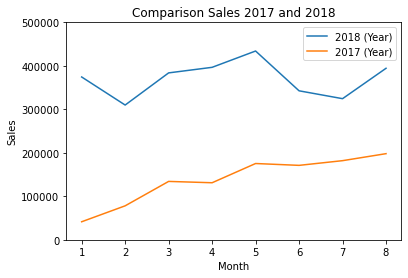

In [12]:
sns.lineplot(x = trend_sales_monthly['month_2017'],
             y = trend_sales_monthly['total_sales_2018'],
             palette = 'orange', label="2018 (Year)")
sns.lineplot(x = trend_sales_monthly['month_2017'],
             y = trend_sales_monthly['total_sales_2017'],
             palette = 'blue', label="2017 (Year)")
plt.legend()
plt.ylim(0, 500000)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Comparison Sales 2017 and 2018")
plt.show()

### Monthly Orders Trend

In [11]:
# Query data
trend_order_monthly = conn.execute("""
                WITH order_2017 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year_2017,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month_2017,
                          COUNT(order_id) AS total_order_2017
                        FROM orders_dataset AS ords
                        WHERE order_status NOT IN ('canceled', 'unavailable')
                        GROUP BY 1, 2
                        HAVING year_2017 = 2017 AND month_2017 < 9
                        ORDER BY month_2017 ASC
                      ),
                      order_2018 AS
                      (
                        SELECT
                          EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year_2018,
                          EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month_2018,
                          COUNT(order_id) AS total_order_2018
                        FROM orders_dataset AS ords
                        WHERE order_status NOT IN ('canceled', 'unavailable')
                        GROUP BY 1, 2
                        HAVING year_2018 = 2018 AND month_2018 < 9
                        ORDER BY month_2018 ASC
                      )
              SELECT *
              FROM order_2017
              LEFT JOIN order_2018
                ON month_2017 = month_2018
              ;
            """).df()

trend_order_monthly

,year_2017,month_2017,total_order_2017,year_2018,month_2018,total_order_2018
0,2017,1,294,2018,1,3016
1,2017,2,630,2018,2,2649
2,2017,3,991,2018,3,3007
3,2017,4,895,2018,4,3043
4,2017,5,1396,2018,5,3182
5,2017,6,1308,2018,6,2759
6,2017,7,1570,2018,7,2744
7,2017,8,1698,2018,8,3198


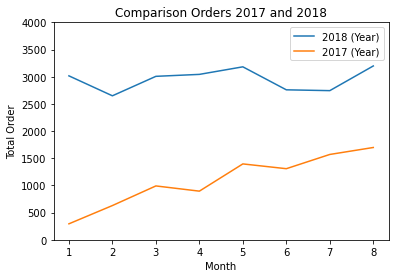

In [13]:
sns.lineplot(x = trend_order_monthly['month_2017'],
             y = trend_order_monthly['total_order_2018'],
             palette = 'orange', label="2018 (Year)")
sns.lineplot(x = trend_order_monthly['month_2017'],
             y = trend_order_monthly['total_order_2017'],
             palette = 'blue', label="2017 (Year)")
plt.legend()
plt.ylim(0, 4000)
plt.xlabel("Month")
plt.ylabel("Total Order")
plt.title("Comparison Orders 2017 and 2018")
plt.show()

### Result

Based on the chart above, from January to August:
- Sales and Orders in 2017: There was a consistent increase in both sales and orders from January to August 2017.
- Comparison with 2018: Sales and orders in 2018 grew to more than twice the levels observed in 2017 over the same period.
- Peak Months in 2018: The highest sales and orders in 2018 occurred in May and August.



## Product Performance Analysis


### Top 10 Sales Category (2017 and 2018)

2017

In [14]:
# Query data
sales_category_2017 = conn.execute("""
                SELECT
                  prod.product_category_name AS product_category,
                  SUM(ord_itm.price) AS total_sales,
                  mean(ord_itm.price) AS average_sales
                FROM order_items_dataset AS ord_itm
                LEFT JOIN product_dataset AS prod
                  ON ord_itm.product_id = prod.product_id
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) = 2017
                  AND EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) < 9
                  AND ords.order_status NOT IN ('canceled', 'unavailable')
                GROUP BY 1
                ORDER BY 2 DESC;
            """).df()
# Sort data
sales_category_2017 = sales_category_2017.sort_values(['total_sales'], ascending=[False])
# Top 10 Product
sales_category_2017_top_10 = sales_category_2017.head(10)
sales_category_2017_top_10

,product_category,total_sales,average_sales
0,bed_bath_table,108681.43,94.752772
1,sports_leisure,83463.77,104.329712
2,furniture_decor,76297.64,78.414841
3,computers_accessories,75730.24,116.150675
4,watches_gifts,73621.80,226.528615
5,health_beauty,73337.49,99.373293
6,cool_stuff,70083.53,165.291344
7,housewares,53130.44,71.316027
8,auto,49632.72,157.065570
9,perfumery,49322.20,156.082911


In [15]:
# Query data
sales_category_2018 = conn.execute("""
                SELECT
                  prod.product_category_name AS product_category,
                  SUM(ord_itm.price) AS total_sales,
                  mean(ord_itm.price) AS average_sales
                FROM order_items_dataset AS ord_itm
                LEFT JOIN product_dataset AS prod
                  ON ord_itm.product_id = prod.product_id
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) = 2018
                  AND EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) < 9
                  AND ords.order_status NOT IN ('canceled', 'unavailable')
                GROUP BY 1
                ORDER BY 2 DESC;
            """).df()
# Sort data
sales_category_2018 = sales_category_2018.sort_values(['total_sales'], ascending=[False])
# Top 10 Product
sales_category_2018_top_10 = sales_category_2018.head(10)
sales_category_2018_top_10

,product_category,total_sales,average_sales
0,health_beauty,302498.32,109.126378
1,bed_bath_table,270371.52,90.274297
2,watches_gifts,253987.95,184.182705
3,sports_leisure,213991.63,106.516491
4,computers_accessories,210549.64,105.963583
5,housewares,176654.06,92.440638
6,furniture_decor,148488.08,86.481118
7,auto,125876.11,113.915032
8,baby,101937.39,135.916520
9,cool_stuff,83670.41,147.048172


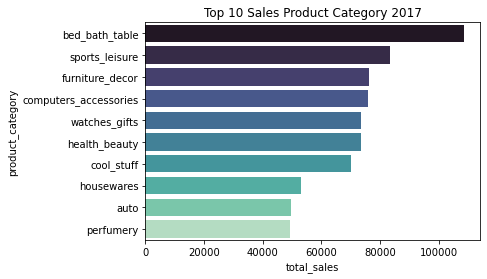

In [16]:
sns.barplot(y='product_category',
            x='total_sales',
            data=sales_category_2017_top_10, orient="h",
            palette='mako')
plt.title("Top 10 Sales Product Category 2017")
plt.show()

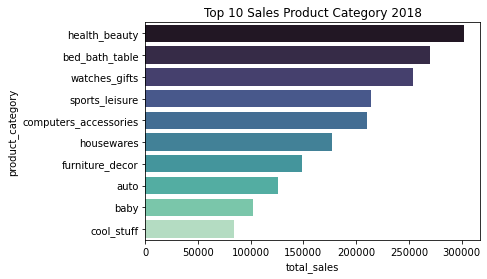

In [17]:
sns.barplot(y='product_category',
            x='total_sales',
            data=sales_category_2018_top_10, orient="h",
            palette='mako')
plt.title("Top 10 Sales Product Category 2018")
plt.show()

### Growth Top 10 Product Sales

In [18]:
# Create table needed
growth_sales_product = pd.merge(sales_category_2017_top_10,
                                sales_category_2018_top_10,
                                how="outer",
                                on=["product_category"])
# Only choose columns needed for analysis
growth_sales_product = growth_sales_product[["product_category", "total_sales_x", "total_sales_y"]]
# rename each column
growth_sales_product = growth_sales_product.rename(columns={"product_category": "Category", 
                                     "total_sales_x": "total_sales_2017",
                                     "total_sales_y": "total_sales_2018"}, errors="raise")
# Create percent_change column
growth_sales_product['percent_change'] = ((growth_sales_product['total_sales_2018'] - growth_sales_product['total_sales_2017']) / growth_sales_product['total_sales_2017']) * 100
growth_sales_product['percent_change'] = growth_sales_product['percent_change'].apply(lambda x: round(x, 2))
# look at the table
growth_sales_product

,Category,total_sales_2017,total_sales_2018,percent_change
0,bed_bath_table,108681.43,270371.52,148.77
1,sports_leisure,83463.77,213991.63,156.39
2,furniture_decor,76297.64,148488.08,94.62
3,computers_accessories,75730.24,210549.64,178.03
4,watches_gifts,73621.80,253987.95,244.99
5,health_beauty,73337.49,302498.32,312.47
6,cool_stuff,70083.53,83670.41,19.39
7,housewares,53130.44,176654.06,232.49
8,auto,49632.72,125876.11,153.62
9,perfumery,49322.20,NaN,NaN


In [19]:
# Sort values
growth_sales_product = growth_sales_product.sort_values(by='percent_change', ascending=False)

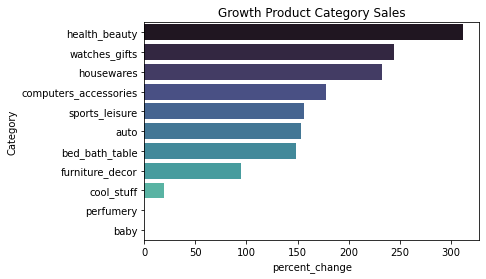

In [21]:
sns.barplot(y='Category',
            x='percent_change',
            data=growth_sales_product, orient="h",
            palette='mako')
plt.title("Growth Product Category Sales")
plt.show()

### Top 10 Purchased Category (2017 and 2018)

2017

In [22]:
# Query data
ord_purch_category_2017 = conn.execute("""
                SELECT
                  prod.product_category_name AS product_category,
                  COUNT(ord_itm.order_id) AS total_order
                FROM order_items_dataset AS ord_itm
                LEFT JOIN product_dataset AS prod
                  ON ord_itm.product_id = prod.product_id
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) = 2017
                  AND EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) < 9
                  AND ords.order_status NOT IN ('canceled', 'unavailable')
                GROUP BY 1;
            """).df()
# Sort data
ord_purch_category_2017 = ord_purch_category_2017.sort_values(['total_order'], ascending=[False])
# Top 10 Product
ord_purch_category_2017_top_10 = ord_purch_category_2017.head(10)
ord_purch_category_2017_top_10

,product_category,total_order
5,bed_bath_table,1147
19,furniture_decor,973
4,sports_leisure,800
6,housewares,745
9,health_beauty,738
2,computers_accessories,652
20,cool_stuff,424
12,toys,387
11,garden_tools,368
13,telephony,363


In [23]:
# Query data
ord_purch_category_2018 = conn.execute("""
                SELECT
                  prod.product_category_name AS product_category,
                  COUNT(ord_itm.order_id) AS total_order
                FROM order_items_dataset AS ord_itm
                LEFT JOIN product_dataset AS prod
                  ON ord_itm.product_id = prod.product_id
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_itm.order_id
                WHERE
                  EXTRACT(year FROM CAST(ords.order_purchase_timestamp AS date)) = 2018
                  AND EXTRACT(month FROM CAST(ords.order_purchase_timestamp AS date)) < 9
                  AND ords.order_status NOT IN ('canceled', 'unavailable')
                GROUP BY 1;
            """).df()
# Sort data
ord_purch_category_2018 = ord_purch_category_2018.sort_values(['total_order'], ascending=[False])
# Top 10 Product
ord_purch_category_2018_top_10 = ord_purch_category_2018.head(10)
ord_purch_category_2018_top_10

,product_category,total_order
1,bed_bath_table,2995
5,health_beauty,2772
16,sports_leisure,2009
23,computers_accessories,1987
13,housewares,1911
6,furniture_decor,1717
3,watches_gifts,1379
10,auto,1105
12,telephony,899
4,perfumery,782


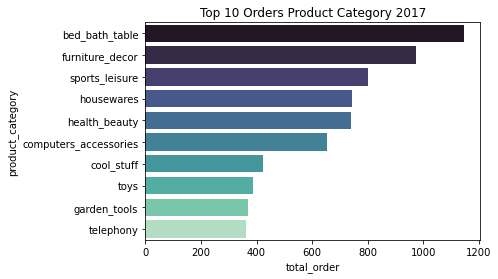

In [25]:
sns.barplot(y='product_category',
            x='total_order',
            data=ord_purch_category_2017_top_10, orient="h",
            palette='mako')
plt.title("Top 10 Orders Product Category 2017")
plt.show()

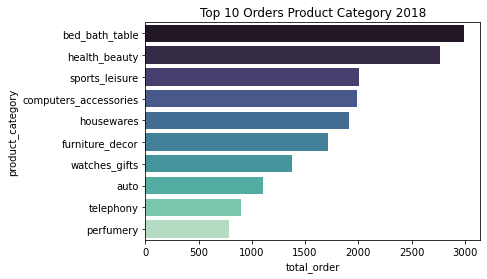

In [26]:
sns.barplot(y='product_category',
            x='total_order',
            data=ord_purch_category_2018_top_10, orient="h",
            palette='mako')
plt.title("Top 10 Orders Product Category 2018")
plt.show()

### Growth Top 10 Product Purchased

In [27]:
# Create table needed
growth_ord_purch_product = pd.merge(ord_purch_category_2017_top_10,
                                ord_purch_category_2018_top_10,
                                how="outer",
                                on=["product_category"])
# Only choose columns needed for analysis
growth_ord_purch_product = growth_ord_purch_product[["product_category", "total_order_x", "total_order_y"]]
# rename each column
growth_ord_purch_product = growth_ord_purch_product.rename(columns={"product_category": "Category", 
                                     "total_order_x": "total_order_2017",
                                     "total_order_y": "total_order_2018"}, errors="raise")
# Create percent_change column
growth_ord_purch_product['percent_change'] = ((growth_ord_purch_product['total_order_2018'] - growth_ord_purch_product['total_order_2017']) / growth_ord_purch_product['total_order_2017']) * 100
growth_ord_purch_product['percent_change'] = growth_ord_purch_product['percent_change'].apply(lambda x: round(x, 2))
# look at the table
growth_ord_purch_product

,Category,total_order_2017,total_order_2018,percent_change
0,bed_bath_table,1147.0,2995.0,161.12
1,furniture_decor,973.0,1717.0,76.46
2,sports_leisure,800.0,2009.0,151.12
3,housewares,745.0,1911.0,156.51
4,health_beauty,738.0,2772.0,275.61
5,computers_accessories,652.0,1987.0,204.75
6,cool_stuff,424.0,NaN,NaN
7,toys,387.0,NaN,NaN
8,garden_tools,368.0,NaN,NaN
9,telephony,363.0,899.0,147.66


In [28]:
# Sort values
growth_ord_purch_product = growth_ord_purch_product.sort_values(by='percent_change', ascending=False)

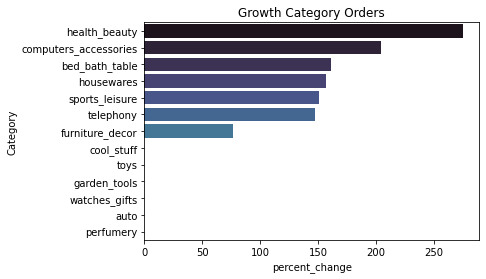

In [29]:
sns.barplot(y='Category',
            x='percent_change',
            data=growth_ord_purch_product, orient="h",
            palette='mako')
plt.title("Growth Category Orders")
plt.show()

### Result

Categories with More than 100% Growth in Both Sales and Orders:
- Health & Beauty
- Housewares
- Computer Accessories
- Sports & Leisure
- Bed, Bath & Table

Categories with More than 100% Growth in Sales:
- Auto
- Watches & Gifts

Category with More than 100% Growth in Orders:
- Telephony

All the categories listed above experienced more than 100% growth in either sales, orders, or both. This significant increase may indicate rising consumer interest or the effectiveness of successful marketing campaigns


## Average order value (AOV) 
2017 and 2018

### Yearly AOV

In [30]:
# Query data
aov_yearly = conn.execute("""
                SELECT 
                    year,
                    MEAN(average_order_value) AS average_order_value
                FROM (
                  SELECT
                    EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                    EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month,
                    STRFTIME('%Y-%m', CAST(order_purchase_timestamp AS date)) AS month_year,
                    SUM(ord_it.price) / COUNT(DISTINCT ord_it.order_id) AS average_order_value
                  FROM order_items_dataset AS ord_it
                  LEFT JOIN orders_dataset AS ords
                    ON ords.order_id = ord_it.order_id
                  WHERE
                    EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) > 2016
                    AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                    AND order_status NOT IN ('canceled', 'unavailable')
                  GROUP BY 1, 2, 3 ) AS final_table
                  GROUP BY 1;
            """).df()
# Sort data
aov_yearly 

,year,average_order_value
0,2018,125.160626
1,2017,129.534875


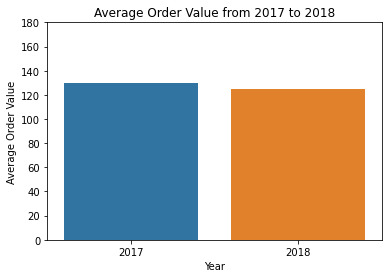

In [31]:
sns.barplot(x='year',
             y='average_order_value',
             data=aov_yearly)
plt.ylim(0, 180)
plt.xlabel("Year")
plt.ylabel("Average Order Value")
plt.title("Average Order Value from 2017 to 2018")
plt.show()

### Monthly AOV

2017

In [32]:
# Query data
aov_2017 = conn.execute("""
                SELECT
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                  EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month,
                  STRFTIME('%Y-%m', CAST(order_purchase_timestamp AS date)) AS month_year,
                  SUM(ord_it.price) / COUNT(DISTINCT ord_it.order_id) AS average_order_value
                FROM order_items_dataset AS ord_it
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_it.order_id
                WHERE
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) = 2017
                  AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                  AND order_status NOT IN ('canceled', 'unavailable')
                GROUP BY 1, 2, 3;
            """).df()
# Sort data
aov_2017 = aov_2017.sort_values(['year', 'month'], ascending=[True, True])
aov_2017

,year,month,month_year,average_order_value
7,2017,1,2017-01,141.106122
5,2017,2,2017-02,124.016000
3,2017,3,2017-03,135.490838
4,2017,4,2017-04,146.583687
6,2017,5,2017-05,125.658739
2,2017,6,2017-06,130.866483
0,2017,7,2017-07,115.903242
1,2017,8,2017-08,116.653887


2018

In [33]:
# Query data
aov_2018 = conn.execute("""
                SELECT
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                  EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) as month,
                  STRFTIME('%Y-%m', CAST(order_purchase_timestamp AS date)) AS month_year,
                  SUM(ord_it.price) / COUNT(DISTINCT ord_it.order_id) AS average_order_value
                FROM order_items_dataset AS ord_it
                LEFT JOIN orders_dataset AS ords
                  ON ords.order_id = ord_it.order_id
                WHERE
                  EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) = 2018
                  AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                  AND order_status NOT IN ('canceled', 'unavailable')
                GROUP BY 1, 2, 3;
            """).df()
# Sort data
aov_2018 = aov_2018.sort_values(['year', 'month'], ascending=[True, True])
aov_2018

,year,month,month_year,average_order_value
7,2018,1,2018-01,124.139406
0,2018,2,2018-02,116.981797
2,2018,3,2018-03,127.637971
6,2018,4,2018-04,130.332550
4,2018,5,2018-05,136.428784
5,2018,6,2018-06,124.171975
1,2018,7,2018-07,118.264472
3,2018,8,2018-08,123.328052


Text(0.5, 1.0, 'Average Order Value from 2017 to 2018 monthly')

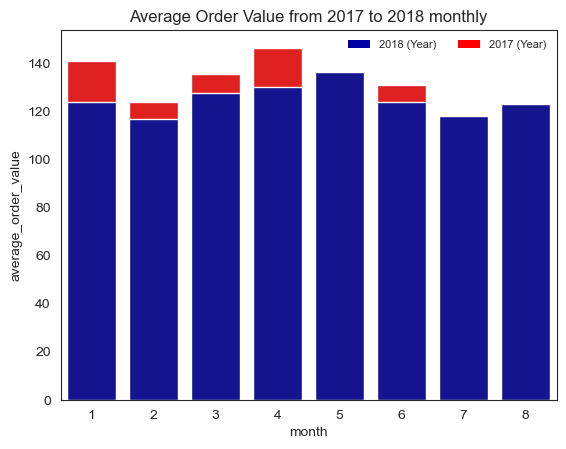

In [58]:
# reference: https://randyzwitch.com/creating-stacked-bar-chart-seaborn/
# https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/
#Set general plot properties
sns.set_style("white")

#Plot 1 - background - aov_2017
sns.barplot(x = aov_2017.month, 
            y = aov_2017.average_order_value, 
            color = "red",
            saturation=0.75)

#Plot 2 - overlay - aov_2018
bottom_plot = sns.barplot(x = aov_2018.month, 
                          y = aov_2018.average_order_value, 
                          color = "#0000A3",
                          saturation=0.75)

# legends
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['2018 (Year)', '2017 (Year)'], loc=1, ncol = 2, prop={'size':8})
l.draw_frame(False)
# title
plt.title("Average Order Value from 2017 to 2018 monthly")

### AOV per Product

2017

In [32]:
# Query data
aov_product_2017 = conn.execute("""
                        SELECT
                            prod.product_category_name AS product_category,
                            SUM(ord_itm.price) AS total_sales,
                            SUM(ord_itm.price) / COUNT(DISTINCT ord_itm.order_id) AS average_order_value
                        FROM order_items_dataset AS ord_itm
                        LEFT JOIN product_dataset AS prod
                            ON ord_itm.product_id = prod.product_id
                        LEFT JOIN orders_dataset AS ords
                            ON ords.order_id = ord_itm.order_id
                        WHERE
                            EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) = 2017
                            AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                            AND order_status NOT IN ('canceled', 'unavailable')
                        GROUP BY 1;
            """).df()
aov_product_2017.head()

,product_category,total_sales,average_order_value
0,office_furniture,27502.57,200.748686
1,baby,24411.46,110.459095
2,computers_accessories,75730.24,139.981959
3,books_general_interest,3349.08,81.684878
4,sports_leisure,83463.77,118.725135


In [33]:
# AOV From Top 10 Category
top_10_cat_aov_2017 = aov_product_2017.sort_values(by='total_sales', ascending=False)
top_10_cat_aov_2017 = top_10_cat_aov_2017.head(10)
top_10_cat_aov_2017

,product_category,total_sales,average_order_value
5,bed_bath_table,108681.43,108.572857
4,sports_leisure,83463.77,118.725135
19,furniture_decor,76297.64,97.442708
2,computers_accessories,75730.24,139.981959
22,watches_gifts,73621.80,247.053020
9,health_beauty,73337.49,108.487411
20,cool_stuff,70083.53,170.519538
6,housewares,53130.44,83.538428
16,auto,49632.72,174.763099
8,perfumery,49322.20,164.407333


In [34]:
# Top 10 Category with Highest AOV
top_10_aov_2017 = aov_product_2017.sort_values(by='average_order_value', ascending=False)
top_10_aov_2017 = top_10_aov_2017.head(10)
top_10_aov_2017

,product_category,total_sales,average_order_value
49,computers,9300.00,1162.500000
35,art,6985.30,776.144444
58,costruction_tools_tools,1532.90,510.966667
38,small_appliances,25172.73,335.636400
64,agro_industry_and_commerce,1305.96,326.490000
32,musical_instruments,12433.30,318.802564
55,furniture_bedroom,3334.87,303.170000
44,dvds_blu_ray,2240.30,280.037500
53,home_construction,2163.39,270.423750
22,watches_gifts,73621.80,247.053020


2018

In [35]:
# Query data
aov_product_2018 = conn.execute("""
                        SELECT
                            prod.product_category_name AS product_category,
                            SUM(ord_itm.price) AS total_sales,
                            SUM(ord_itm.price) / COUNT(DISTINCT ord_itm.order_id) AS average_order_value
                        FROM order_items_dataset AS ord_itm
                        LEFT JOIN product_dataset AS prod
                            ON ord_itm.product_id = prod.product_id
                        LEFT JOIN orders_dataset AS ords
                            ON ords.order_id = ord_itm.order_id
                        WHERE
                            EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) = 2018
                            AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                            AND order_status NOT IN ('canceled', 'unavailable')
                        GROUP BY 1;
            """).df()
aov_product_2018.head()

,product_category,total_sales,average_order_value
0,stationery,57105.94,90.357500
1,bed_bath_table,270371.52,109.064752
2,electronics,32801.62,50.934193
3,watches_gifts,253987.95,194.477757
4,perfumery,79703.59,113.054738


In [36]:
# AOV From Top 10 Category
top_10_cat_aov_2018 = aov_product_2018.sort_values(by='total_sales', ascending=False)
top_10_cat_aov_2018 = top_10_cat_aov_2018.head(10)
top_10_cat_aov_2018

,product_category,total_sales,average_order_value
5,health_beauty,302498.32,122.468955
1,bed_bath_table,270371.52,109.064752
3,watches_gifts,253987.95,194.477757
16,sports_leisure,213991.63,117.771948
23,computers_accessories,210549.64,124.659349
13,housewares,176654.06,108.243909
6,furniture_decor,148488.08,112.832888
10,auto,125876.11,121.737050
19,baby,101937.39,146.461767
9,cool_stuff,83670.41,151.851924


In [37]:
# Top 10 Category with Highest AOV
top_10_aov_2018 = aov_product_2018.sort_values(by='average_order_value', ascending=False)
top_10_aov_2018 = top_10_aov_2018.head(10)
top_10_aov_2018

,product_category,total_sales,average_order_value
54,computers,22230.92,1111.546000
51,small_appliances_home_oven_and_coffee,16453.49,514.171562
52,home_appliances_2,24602.79,473.130577
71,pc_gamer,438.00,438.000000
41,agro_industry_and_commerce,18090.49,266.036618
35,musical_instruments,42835.51,261.192134
30,construction_tools_safety,10290.64,239.317209
7,small_appliances,33015.08,223.074865
14,office_furniture,61735.83,212.150619
27,kitchen_dining_laundry_garden_furniture,15750.84,210.011200


### Compare AOV Product in 2017 and 2018

In [38]:
# Create table needed
growth_aov_product = pd.merge(top_10_cat_aov_2017,
                            top_10_cat_aov_2018,
                            how="outer",
                            on=["product_category"])
# Only choose columns needed for analysis
growth_aov_product = growth_aov_product[["product_category", "average_order_value_x", "average_order_value_y"]]
# rename each column
growth_aov_product = growth_aov_product.rename(columns={"product_category": "Category", 
                                     "average_order_value_x": "average_order_value_2017",
                                     "average_order_value_y": "average_order_value_2018"}, errors="raise")
# Create percent_change column
growth_aov_product['percent_change'] = ((growth_aov_product['average_order_value_2018'] - growth_aov_product['average_order_value_2017']) / growth_aov_product['average_order_value_2017']) * 100
growth_aov_product['percent_change'] = growth_aov_product['percent_change'].apply(lambda x: round(x, 2))
# look at the table
growth_aov_product

,Category,average_order_value_2017,average_order_value_2018,percent_change
0,bed_bath_table,108.572857,109.064752,0.45
1,sports_leisure,118.725135,117.771948,-0.80
2,furniture_decor,97.442708,112.832888,15.79
3,computers_accessories,139.981959,124.659349,-10.95
4,watches_gifts,247.053020,194.477757,-21.28
5,health_beauty,108.487411,122.468955,12.89
6,cool_stuff,170.519538,151.851924,-10.95
7,housewares,83.538428,108.243909,29.57
8,auto,174.763099,121.737050,-30.34
9,perfumery,164.407333,NaN,NaN


In [39]:
# Sort values
growth_aov_product = growth_aov_product.sort_values(by='percent_change', ascending=False)

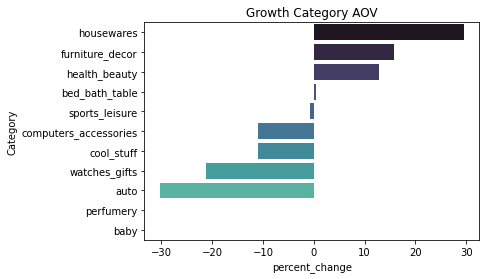

In [40]:
sns.barplot(y='Category',
            x='percent_change',
            data=growth_aov_product, orient="h",
            palette='mako')
plt.title("Growth Category AOV")
plt.show()

### Result

Average Order Value from 2017 to 2018:
- The average order value (AOV) has slightly decreased from 2017 to 2018.

Monthly Average Order Value from 2017 to 2018:
- Although sales in 2018 are approximately twice from 2017, the AOV in most months of 2017 remains higher than in 2018.
- The peak sales months in 2018 are May and August. Similarly, the AOV for May and August 2018 is higher compared to the same months in 2017.




Among the top 10 sales categories, only the following categories have a positive change in AOV and increased sales from 2017 to 2018:
- Health & Beauty, 
- Housewares, 
- Bed, Bath & Table

Sales and orders increased from 2017 to 2018, but the average order value (AOV) slightly decreased. Let's take a closer look at the computers_accessories category, which experienced growth in both sales and orders during 2017 and 2018, but saw a decline in AOV.

## Deep Dive on Product Categories (computers_accessories)

### Deep Dive on computers_accessories in 2017 and 2018

In [22]:
# Query data
deep_dive = conn.execute("""
                        WITH aov AS (
                            SELECT
                                EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                                SUM(ord_it.price) / COUNT(DISTINCT ord_it.order_id) AS average_order_value
                            FROM order_items_dataset AS ord_it
                            LEFT JOIN orders_dataset AS ords
                                ON ords.order_id = ord_it.order_id
                            LEFT JOIN product_dataset AS prod
                                ON ord_it.product_id = prod.product_id
                            WHERE
                                EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) > 2016
                                AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                                AND order_status NOT IN ('canceled', 'unavailable')
                                AND prod.product_category_name = 'computers_accessories'
                            GROUP BY 1
                        ),
                        data_computer_acc AS (
                            SELECT
                                EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) as year,
                                COUNT(DISTINCT customer_unique_id) AS total_unique_cust,
                                SUM(ord_itm.price) AS total_sales,
                                MEAN(ord_itm.price) AS average_sales,
                                COUNT(ord_itm.order_id) AS total_order
                            FROM order_items_dataset AS ord_itm
                            LEFT JOIN product_dataset AS prod
                                ON ord_itm.product_id = prod.product_id
                            LEFT JOIN orders_dataset AS ords
                                ON ords.order_id = ord_itm.order_id
                            LEFT JOIN customers_dataset AS cust
                                ON cust.customer_id = ords.customer_id
                            WHERE
                                EXTRACT(year FROM CAST(order_purchase_timestamp AS date)) > 2016
                                AND EXTRACT(month FROM CAST(order_purchase_timestamp AS date)) < 9
                                AND order_status NOT IN ('canceled', 'unavailable')
                                AND prod.product_category_name = 'computers_accessories'
                            GROUP BY 1)
                        SELECT 
                            table1.year,
                            total_unique_cust,
                            total_sales,
                            average_sales,
                            total_order,
                            average_order_value
                        FROM data_computer_acc AS table1
                        LEFT JOIN aov AS table2
                            ON table1.year = table2.year
                        ;
            """).df()
deep_dive

,year,total_unique_cust,total_sales,average_sales,total_order,average_order_value
0,2018,1657,210549.64,105.963583,1987,124.659349
1,2017,534,75730.24,116.150675,652,139.981959


### Result

Orders and Sales Performance of  "computers_accessories" :
- Orders: The number of orders in the "computers_accessories" category increased by 204.75%. Specifically, from 652 in 2017 to 1,987 in 2018.
- Sales: Sales in the same category grew by 178.03%, with total sales increasing from R$ 7,573.024 in 2017 to R$ 210,549.64 in 2018.

Average Order Value (AOV) of  "computers_accessories" :
- 2017 AOV: R$ 139.98
- 2018 AOV: R$ 124.66
- The AOV decreased by 10.95% from 2017 to 2018.

From the data above, we it can be concluded that:
- Increased Sales and Orders: The significant increase in both total orders and sales suggests that the category has grown substantially in terms of volume.
- Decreased Average Order Value: Despite the growth in orders and sales, the average order value decreased by 10.95%. This decrease could indicate a shift toward selling more budget-friendly products or running promotions and discounts that led to higher sales volumes but lower prices per transaction.



# Conclusion & Recommendation for Future Analysis

## Conclusion
If the computers_accessories deep dive to look at the customer and average sales, we can conclude that:
- From the deep dive of the computers_accessories category, the increase in the number of unique customers and total orders suggests that the Brazilian e-commerce platform has successfully captured a larger portion of the market and reached new customer segments.
- The stability in the top 10 sales categories from 2017 to 2018 indicates that existing customers are becoming more familiar with the platform. This increased brand recognition could facilitate repeat purchases and create opportunities for upselling or cross-selling.
- It is important to assess the impact of these changes on overall profitability. While sales and orders have increased, the decrease in AOV and potential changes in profit margins should be carefully analyzed to ensure that profitability is also on an upward trend.

## Recommendations for Future Analysis:
- Profitability Analysis: Further analyze profit margins and overall profitability to ensure that the increase in sales and orders is translating into higher profits.

# Close Connection & Commit changes

In [23]:
# Commit the changes
conn.commit()

In [27]:
# close the connection
conn_p.close()
conn_d.close()

# Reference

ETL

Connect, read & write postgreSQL to Duckdb and Psycopg2
- https://duckdb.org/2022/09/30/postgres-scanner
- https://www.geeksforgeeks.org/how-to-insert-a-pandas-dataframe-to-an-existing-postgresql-table/
- https://github.com/NaysanSaran/pandas2postgresql/blob/master/notebooks/Psycopg2_Bulk_Insert_Speed_Benchmark.ipynb
- https://www.datacamp.com/blog/an-introduction-to-duckdb-what-is-it-and-why-should-you-use-it
- https://duckdb.org/docs/data/csv/tips.html
- https://duckdb.org/docs/guides/meta/list_tables.html
- https://duckdb.org/docs/guides/python/import_pandas.html
- https://www.youtube.com/watch?v=W-8tEFAWD5A
- https://stackoverflow.com/questions/71797515/how-to-read-loop-through-multiple-csv-files-in-a-folder-using-google-colab-pyth
- https://www.dataquest.io/blog/tutorial-connect-install-and-query-postgresql-in-python/

Product Sales Analysis
- https://chartexpo.com/blog/year-over-year-growth-chart
- https://glints.com/id/lowongan/average-order-value/
- https://www.littlestreamsoftware.com/articles/average-order-value-dropping-in-repeat-orders/

<!-- - https://ppcexpo.com/blog/sales-data-analysis-examples
-https://www.magicbean.ai/articles/finding-products-that-are-frequently-bought-together
- https://stackoverflow.com/questions/18578216/finding-products-that-customers-bought-together -->